#### Implementing a  Decision Tree with the hyperparameters using GridSearchCV

In [1]:
#importing relevant libraries

import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
moonData = make_moons(n_samples=10000,noise=0.5,shuffle=True,random_state=7)

In [3]:
#deciding the feature variables and target variables 
X,y = moonData

In [4]:
X

array([[-0.3235852 ,  1.13273709],
       [-0.53842532,  1.36133601],
       [ 1.08869447,  0.64569268],
       ...,
       [ 0.18995655,  0.44851952],
       [ 1.1209312 ,  0.63069964],
       [ 1.0252073 , -0.53226391]])

In [5]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [6]:
#splitting out  the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#creating a parameter dictionary containing all the possible values for the hyperparameters
params = {
           'max_leaf_nodes': list(range(2, 100)),
           'min_samples_split': [2, 3, 4],
           'criterion': ['gini', 'entropy'],
           'max_depth': [4,6,8,12]
         }

In [8]:
#creating an object for the GridSearchCV
gridSearch = GridSearchCV(DecisionTreeClassifier(),params,verbose=1)

In [9]:
#fitting the model
%time
gridSearch.fit(X_train,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11760 out of 11760 | elapsed:  4.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [10]:
gridSearch.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [11]:
print("Best Criterion for the tree :",gridSearch.best_estimator_.get_params()['criterion'])
print("Maximum Optimal Depth for the tree :",gridSearch.best_estimator_.get_params()['max_depth'])
print("Maximum leaf nodes for the tree :",gridSearch.best_estimator_.get_params()['max_leaf_nodes'])
print("Minimum Samples Split for the tree :",gridSearch.best_estimator_.get_params()['min_samples_split'])

Best Criterion for the tree : gini
Maximum Optimal Depth for the tree : 4
Maximum leaf nodes for the tree : 10
Minimum Samples Split for the tree : 2


In [12]:
#Using Cross Validation for evaluating the model 
CV_Result = cross_val_score(DecisionTreeClassifier(),X,y,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')
print("Average Accuracy :",round(CV_Result.mean(),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Average Accuracy : 0.75


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


## Visualizing a Decision Tree (Just for illustration)

In [35]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

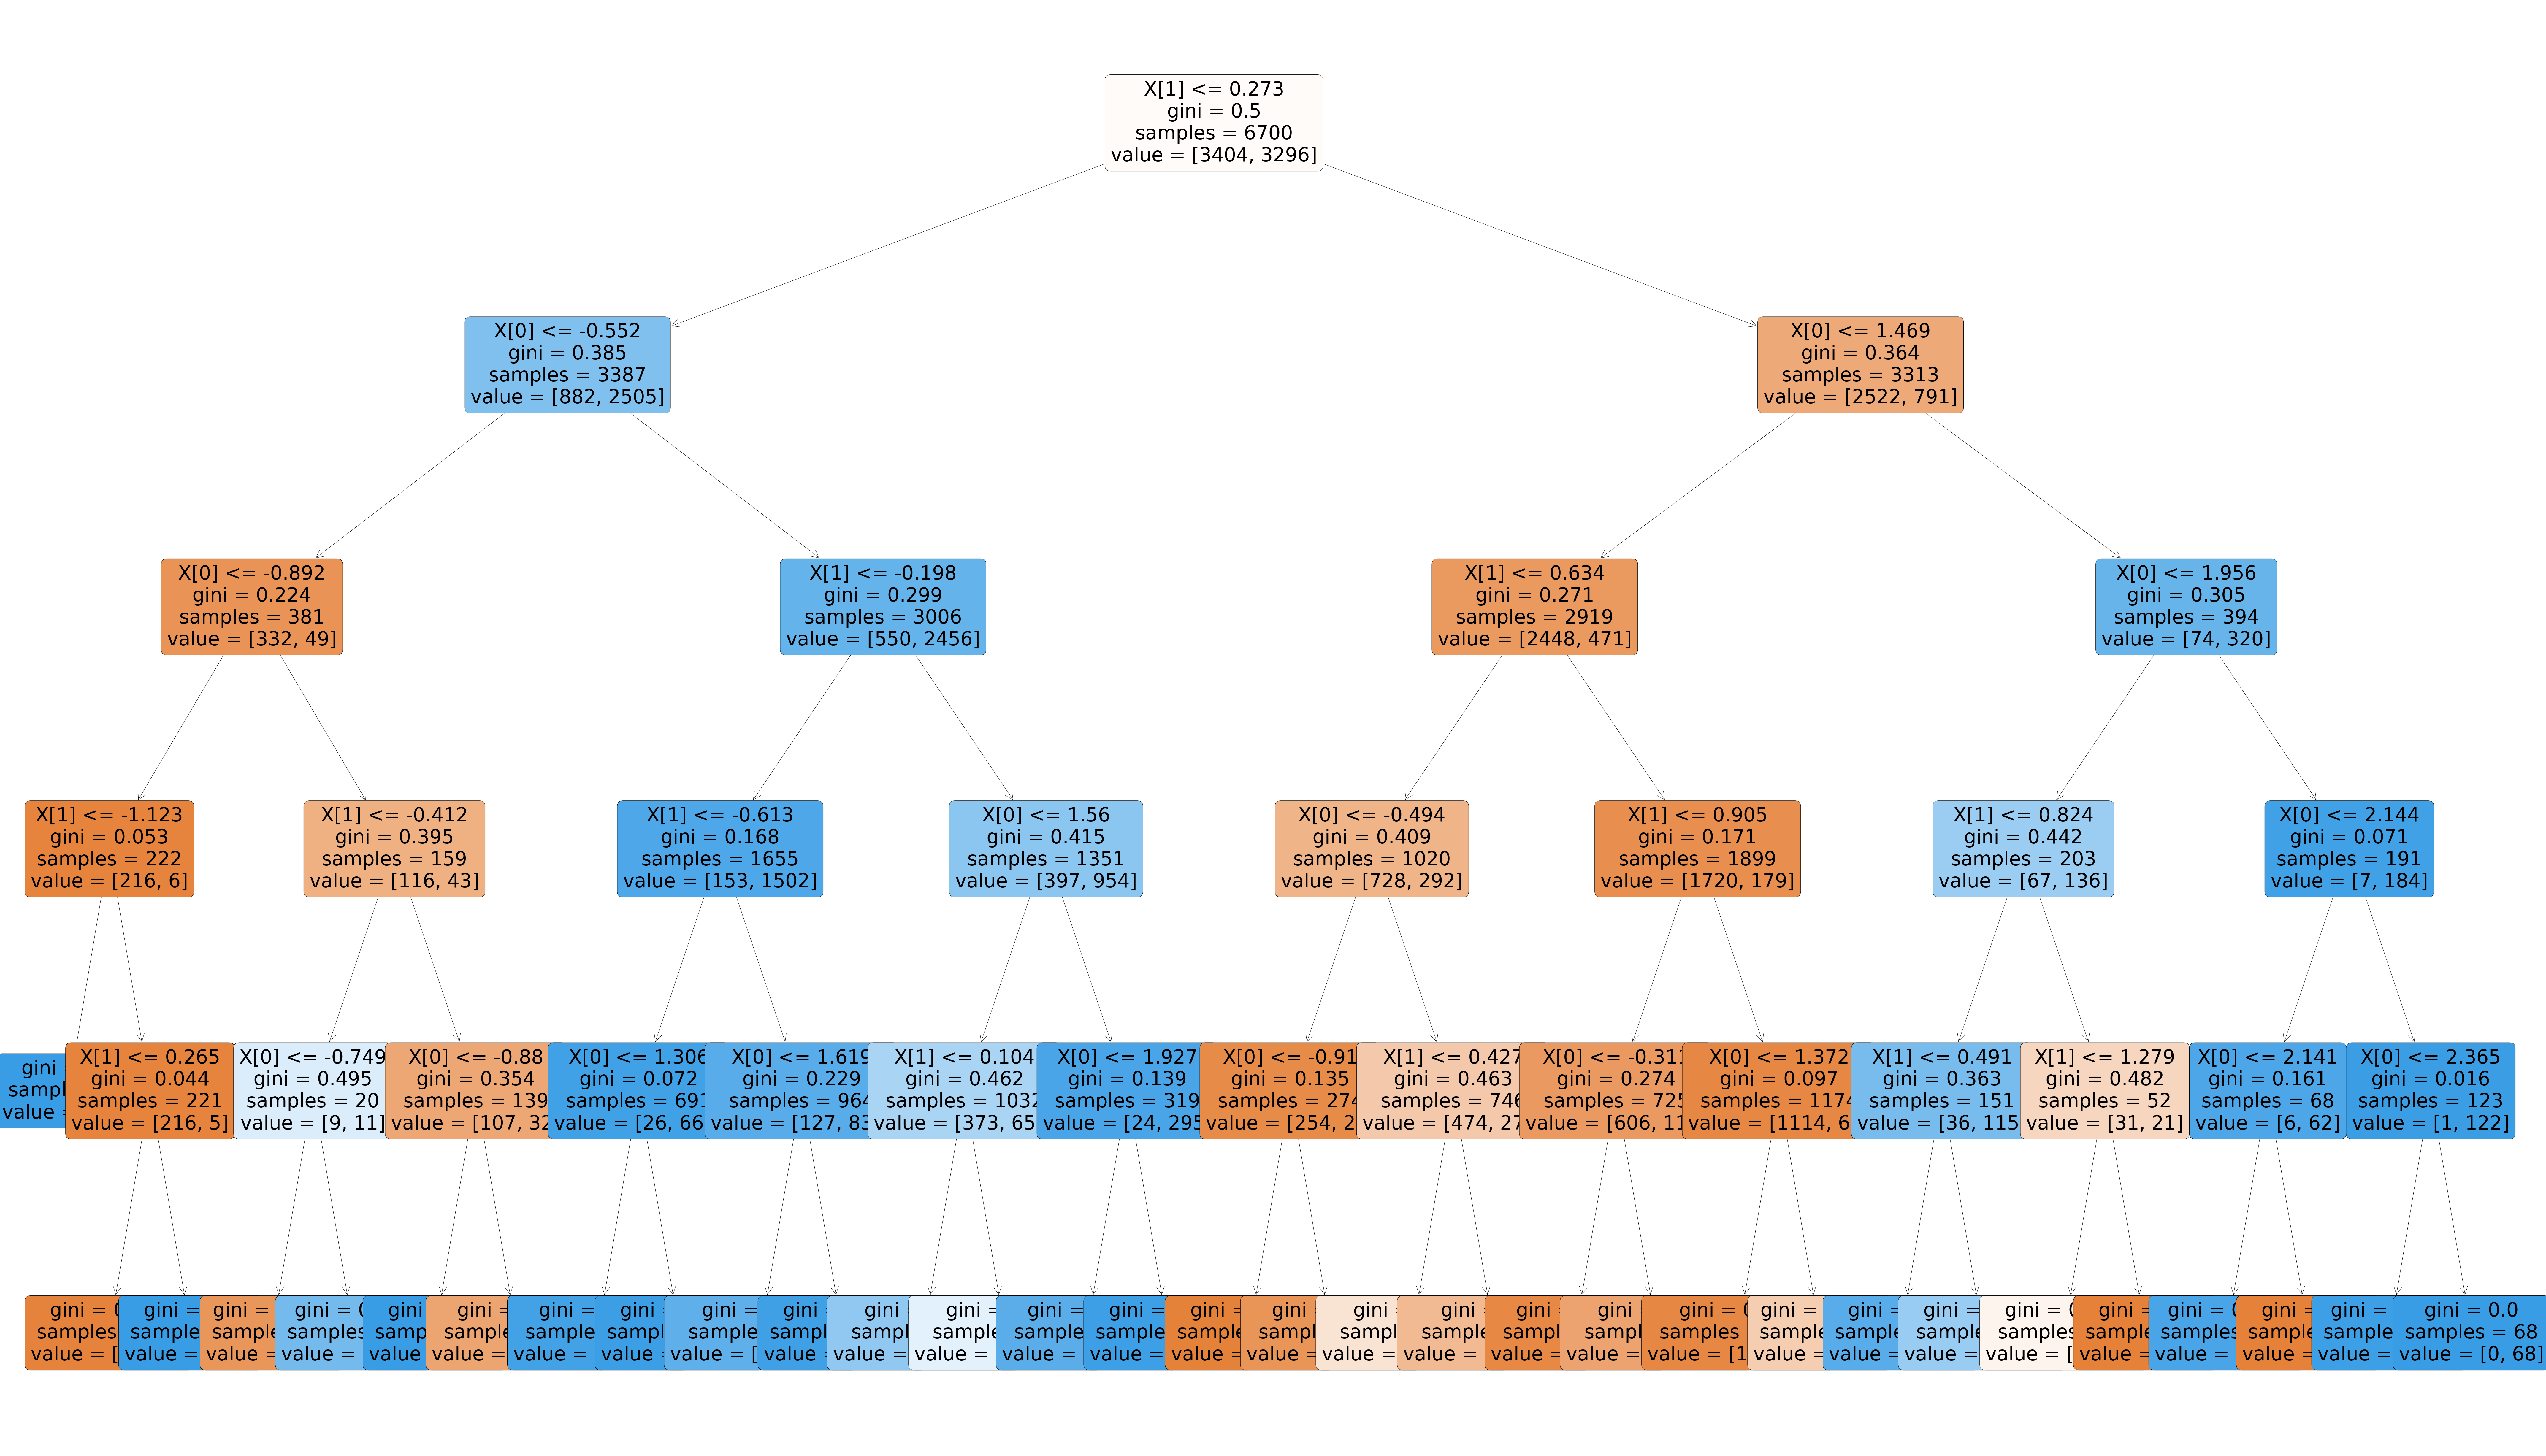

<Figure size 432x288 with 0 Axes>

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(150,90))  
_ = tree.plot_tree(classifier, feature_names = None, 
             filled=True, fontsize=65, rounded = True)
plt.show()

#saving the image
plt.savefig('decisionTree.png')